In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
import pickle

from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications import Xception
from keras.applications import VGG16 ,VGG19
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score , f1_score  , recall_score

In [3]:
# VGG 19
# Binary Classification


In [4]:
img_height ,img_width = (224,224)
batch_size = 64

train_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Training"
valid_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/validation"
test_data_dir = "C:/Users/ASUS/Gray_Training/Binary Classification/Testing"

In [5]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    validation_split = 0)

train_set = train_datagen.flow_from_directory(
     train_data_dir,
     target_size = (img_height,img_width),
     batch_size = batch_size,
     class_mode = 'categorical',
     subset = 'training')

valid_generator = (train_datagen.flow_from_directory(
     valid_data_dir,
     target_size = (img_height,img_width),
     batch_size = 1,
     class_mode = 'categorical',
     subset = 'validation')
)

Found 966 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1/255)

test_set = test_datagen.flow_from_directory(
            test_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'categorical')

Found 121 images belonging to 2 classes.


In [7]:
valid_datagen = ImageDataGenerator(rescale = 1/255)

valid_set = valid_datagen.flow_from_directory(
            valid_data_dir,
            target_size = (img_height,img_width),
            batch_size = 1,
            class_mode = 'categorical')

Found 154 images belonging to 2 classes.


In [8]:
X, y = train_set.next()
X.shape

(64, 224, 224, 3)

In [9]:
VGG_arch_2 = VGG19(input_shape = (img_height ,img_width , 3) , weights = 'imagenet', include_top = False)
for layer in VGG_arch_2.layers:
    layer.trainable = False
#VGG_arch_2.summary()    
X = VGG_arch_2.output
X = Flatten()(X)
X = Dense(1024, 
          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-2),
          activation = 'relu')(X)
X = Dense(512, 
          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-2),
          activation = 'relu')(X)
X = Dense(128, 
          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3),
          bias_regularizer=regularizers.L2(1e-2),
          activity_regularizer=regularizers.L2(1e-2),
          activation = 'relu')(X)


#X = Dense(128, activation = 'relu')(X)

#X = Dropout(0.4)(X)
#X = Dense(2048, activation = 'relu')(X)
#X = Dropout(0.2)(X)
predictions = Dense(train_set.num_classes , activation = 'softmax')(X)
model = Model(inputs = VGG_arch_2.input , outputs = predictions)


#for layer in base_model.layers:
    #layer.trainable = False
    
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
r = model.fit(train_set, validation_data = valid_set , epochs = 25)


Epoch 1/25
16/16 [==============================] - 184s 12s/step - loss: 9.6706 - accuracy: 0.8313 - val_loss: 7.5493 - val_accuracy: 0.8247
Epoch 2/25
16/16 [==============================] - 191s 12s/step - loss: 6.0475 - accuracy: 0.8727 - val_loss: 4.7820 - val_accuracy: 0.7857
Epoch 3/25
16/16 [==============================] - 192s 12s/step - loss: 3.6833 - accuracy: 0.8872 - val_loss: 2.8740 - val_accuracy: 0.7662
Epoch 4/25
16/16 [==============================] - 189s 12s/step - loss: 2.0492 - accuracy: 0.8996 - val_loss: 1.6080 - val_accuracy: 0.8052
Epoch 5/25
16/16 [==============================] - 191s 12s/step - loss: 1.2055 - accuracy: 0.9058 - val_loss: 1.1929 - val_accuracy: 0.7727
Epoch 6/25
16/16 [==============================] - 192s 12s/step - loss: 0.8999 - accuracy: 0.9089 - val_loss: 0.9297 - val_accuracy: 0.7987
Epoch 7/25
16/16 [==============================] - 196s 12s/step - loss: 0.7602 - accuracy: 0.8934 - val_loss: 0.8767 - val_accuracy: 0.7922
Epoch 

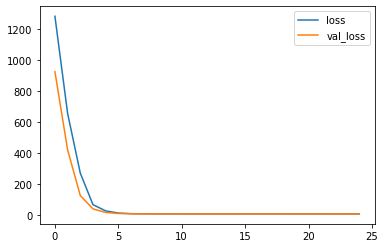

In [10]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

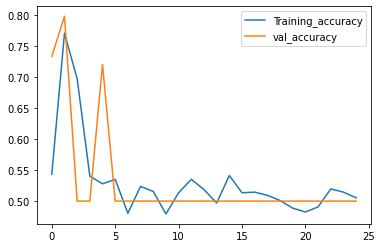

In [11]:
plt.plot(r.history['accuracy'], label = 'Training_accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()